In [1]:
import keras

Using TensorFlow backend.


In [2]:
import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [3]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

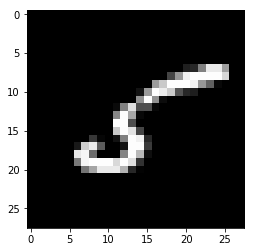

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
first_image = train_images[11]
plt.imshow(first_image, cmap='gray')
plt.show()

In [5]:
train_images[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
train_images = (train_images / 255) - 5
test_images = (test_images / 255) - 5

In [7]:

train_images[0]

array([[-5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        ],
       [-5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        ],
       [-5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.    

In [8]:
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

In [9]:
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [10]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [11]:
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
)


Epoch 1/5
60000/60000 [==============================] - 24s 392us/step - loss: 1.6134 - accuracy: 0.4259
Epoch 2/5
60000/60000 [==============================] - 19s 319us/step - loss: 0.8790 - accuracy: 0.6980
Epoch 3/5
60000/60000 [==============================] - 17s 282us/step - loss: 0.7276 - accuracy: 0.7545
Epoch 4/5
60000/60000 [==============================] - 19s 309us/step - loss: 0.6336 - accuracy: 0.7895
Epoch 5/5
60000/60000 [==============================] - 24s 405us/step - loss: 0.5860 - accuracy: 0.8055


In [12]:
# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

10000/10000 [==============================] - 4s 373us/step


[0.5205660202741623, 0.8317999839782715]

In [13]:
test_images[0].reshape((28,28))

array([[-5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        ],
       [-5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        ],
       [-5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.    

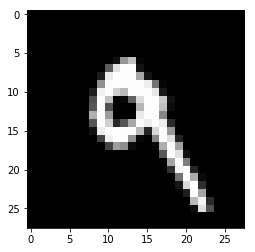

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
first_image = test_images[7]
plt.imshow(first_image.reshape((28,28)), cmap='gray')
plt.show()

In [15]:

np.argmax(model.predict(test_images[7].reshape((-1,784))))

9

In [16]:
# Save the model to disk.
model.save_weights('model.h5')

# Load the model from disk later using:
# model.load_weights('model.h5')

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]


[7 2 1 0 4]
[7 2 1 0 4]
